In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import joblib

In [2]:
#Loading the data
data = pd.read_excel("data2.xlsx")
data.head()


,AD,R,E,T
0,437.086107,2040.288035,70,2
1,955.642876,3761.475756,54,5
2,758.794548,2884.905020,32,9
3,638.792636,2758.107970,82,7
4,240.416776,1633.378851,69,8


In [3]:
#definde the variables : independent and dependent variables
X = data[['AD','E','T']]
Y = data['R']

In [4]:
#Splitting the data
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

print("Data split completed Sucessfully")

Data split completed Sucessfully


In [5]:
#initializing the Ridge regression model with alpha (regularization strength)

alpha_value = 1.0 #adjustable value

model = Ridge(alpha=alpha_value)

In [6]:
#Training the model on the dataset
model.fit(X_train, y_train)
print('Model Training Completed')

Model Training Completed


In [7]:
#Make predictions
y_pred = model.predict(X_test)

In [8]:
#Evaluating the model 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Reporting eval matrics

print("Mean Squared Error:",mse)
print("R2 Score:", r2)

Mean Squared Error: 2842.5371939737456
R2 Score: 0.9956537136724605


In [9]:
#Report of coefficient and intercept
print("\nModel COefficients")
for i , col in enumerate(X.columns):
    print(f"{col}:{model.coef_[i]}")

print("Intercept(a):", model.intercept_)


Model COefficients
AD:3.014010100579545
E:5.094455763292405
T:2.6760809526332037
Intercept(a): 485.38233029236903


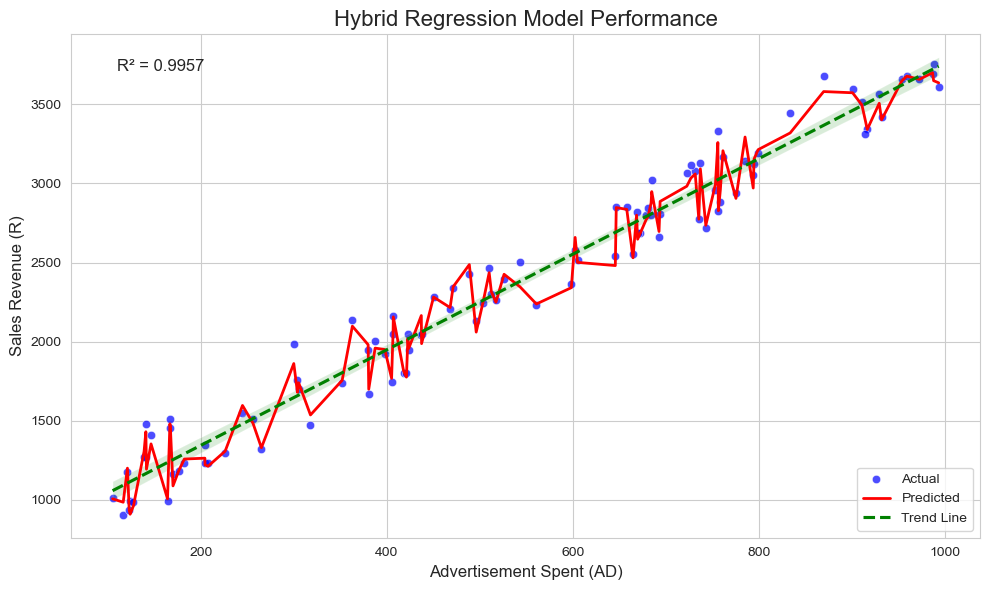

In [10]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Prepare data for plotting
if isinstance(X_test, pd.DataFrame):
    X_test_plot = X_test.iloc[:, 0].values
elif hasattr(X_test, 'shape') and len(X_test.shape) > 1:
    X_test_plot = X_test.ravel()
else:
    X_test_plot = X_test

# Create a DataFrame for easy plotting with Seaborn
plot_df = pd.DataFrame({
    'Advertisement Spent': X_test_plot,
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

# Plot actual data points
sns.scatterplot(x='Advertisement Spent', y='Actual Sales', data=plot_df, 
                label='Actual', color='blue', alpha=0.7)

# Plot predicted values
sns.lineplot(x='Advertisement Spent', y='Predicted Sales', data=plot_df, 
             label='Predicted', color='red', linewidth=2)

# Add regression line with confidence interval
sns.regplot(x='Advertisement Spent', y='Actual Sales', data=plot_df, 
            scatter=False, ci=95, line_kws={'color': 'green', 'linestyle': '--'}, 
            label='Trend Line')

# Calculate and display R² value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top')

# Enhance the plot
plt.title('Hybrid Regression Model Performance', fontsize=16)
plt.xlabel('Advertisement Spent (AD)', fontsize=12)
plt.ylabel('Sales Revenue (R)', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
#Saving the model
model_filename = 'final_ridge_regression_model.joblib'
joblib.dump(model,model_filename)
print(f"\nModel saved as {model_filename}")


Model saved as final_ridge_regression_model.joblib
